In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('Life Expectancy Data.csv',sep=',')

In [8]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ','_')


In [10]:
data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
data.groupby(['status'])['country'].nunique()

status
Developed      32
Developing    161
Name: country, dtype: int64

### Initial Analysis

In [12]:
data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [13]:
len(data[data.isnull().any(axis=1)])/len(data) * 100

43.87338325391423

43% of rows have at least one missing value. Since we're going to use alot of parameters, we won't drop /replace missing values

In [14]:
data.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [15]:
data.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
year,2938,2007,4,2000,2004,2008,2012,2015
life_expectancy,2928,69,9,36,63,72,75,89
adult_mortality,2928,164,124,1,74,144,228,723
infant_deaths,2938,30,117,0,0,3,22,1800
alcohol,2744,4,4,0,0,3,7,17
percentage_expenditure,2938,738,1987,0,4,64,441,19479
hepatitis_b,2385,80,25,1,77,92,97,99
measles,2938,2419,11467,0,0,17,360,212183
bmi,2904,38,20,1,19,43,56,87
under-five_deaths,2938,42,160,0,0,4,28,2500


##### **Task 1**: How is like expectancy distributed? What is the world average life expectancy? Is it the same categories? How are they different?

<Axes: >

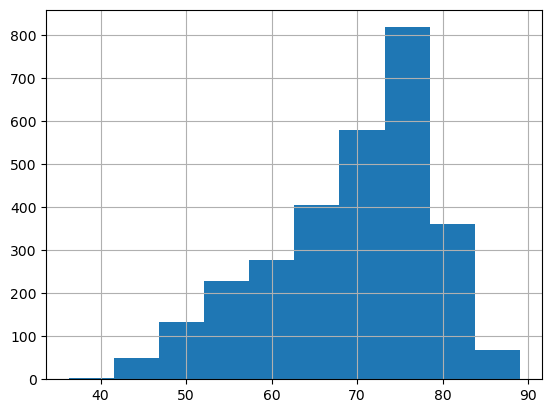

In [16]:
data.life_expectancy.hist()

In [17]:
print(data.life_expectancy.mean())
print(data.life_expectancy.median())

69.22493169398908
72.1


array([<Axes: title={'center': 'Developed'}>,
       <Axes: title={'center': 'Developing'}>], dtype=object)

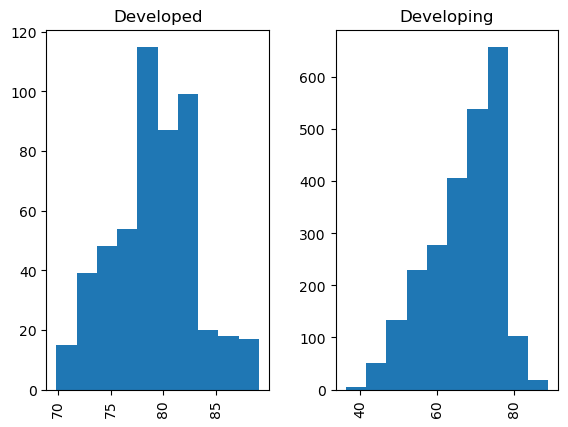

In [18]:
data.life_expectancy.hist(by=data['status'])

In [19]:
data.groupby(['status'])['life_expectancy'].agg(['mean','median','min','max']).reset_index()

,status,mean,median,min,max
0,Developed,79.197852,79.25,69.9,89.0
1,Developing,67.111465,69.00,36.3,89.0


<Axes: xlabel='life_expectancy', ylabel='Count'>

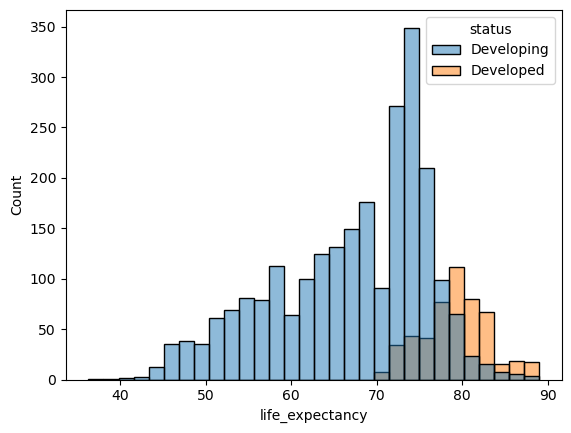

In [20]:
import seaborn as sns
sns.histplot(data, x='life_expectancy',hue="status")

**Conclusion on life expectancy for WHO:**

The average life expectancy for all data is 72 years, however thae distributions not normal and looks different for both types of countries. While for developed countries the expectancy starts around 70 years, for developing it can be lower than 40 and difference in average life expectancy is 10 years. That is a big difference that should be reduced, so WHO needs to help developing countries catch up.

##### **Task 2**: Identify which countries' mortality rates are in "risk zones"

**Which countries are in risk zones in terms of martality? What is average mortality overall?By category**

Note: A country is considered to be in the risk zone if it's mortality rates is above average.
Lets start by finding countries that are not in the risk zone overall but have higher than average mortality rates per group. Lets start by looking at the distribution.


<Axes: xlabel='adult_mortality', ylabel='Count'>

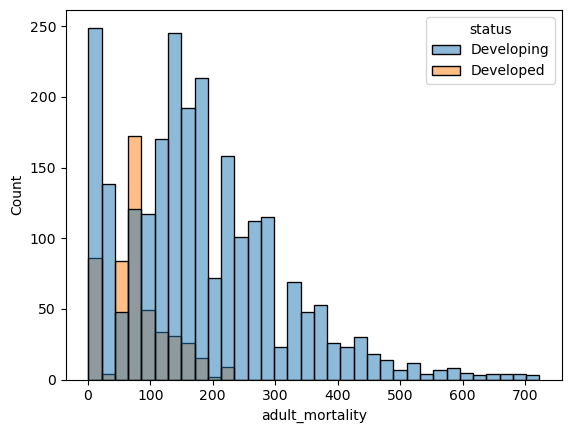

In [21]:

sns.histplot(data, x='adult_mortality',hue="status")


**Q** Is this a normal distribution?

**A** No.


How does this change our undersatanding and use of the mean and median?

1. What does this long tail mean? **A** It means that we have outliers, if it is right skewed that more observations in the higher zone.

2. Can you guess waht is going to be bigger, the mean or the meadian? my **A** guess due to the data is skewed to the right the mean will be bigger
3. Which group will have a bigger difference in mean and median? **A** the group of deveoping will be bigger

In [22]:
data.groupby(['status'])['adult_mortality'].agg(['mean','median','min','max']).reset_index()

,status,mean,median,min,max
0,Developed,79.685547,73.0,1.0,229.0
1,Developing,182.833195,163.0,1.0,723.0


Since Mean > Median we have a positive skew(tail to the right). Therefore we will consider the median to the average.

Now let's identify which countries have a higher than average mortality rate.

In [23]:
overall_median = data.adult_mortality.median()
overall_median

144.0

In [24]:
developed_median = data.query('status == "Developed"').adult_mortality.median()
developing_median = data.query('status == "Developing"').adult_mortality.median()
print(developed_median)
print(developing_median)

73.0
163.0


In [25]:
developed_in_risk = data.query('status == "Developed" and adult_mortality > @developed_median').country.unique()
print(developed_in_risk)
len(developed_in_risk)

['Australia' 'Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Czechia' 'Denmark'
 'Germany' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand' 'Norway'
 'Poland' 'Portugal' 'Romania' 'Singapore' 'Slovakia' 'Slovenia' 'Spain'
 'Switzerland' 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America']


30

In [26]:
developing_in_risk = data.query('status =="Developing" and adult_mortality > @developing_median').country.unique()
print(developing_in_risk)
len(developing_in_risk)

['Afghanistan' 'Angola' 'Bahamas' 'Bangladesh' 'Belarus' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Botswana' 'Brazil'
 'Burkina Faso' 'Burundi' "Côte d'Ivoire" 'Cambodia' 'Cameroon'
 'Central African Republic' 'Chad' 'Colombia' 'Comoros' 'Congo'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Djibouti' 'Dominican Republic'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Fiji' 'Gabon' 'Gambia' 'Ghana' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India' 'Indonesia' 'Iraq'
 'Jamaica' 'Kazakhstan' 'Kenya' 'Kiribati' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Lesotho' 'Liberia' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Mauritius'
 'Micronesia (Federated States of)' 'Mongolia' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'Nicaragua' 'Niger' 'Nigeria' 'Pakistan'
 'Papua New Guinea' 'Paraguay' 'Philippines' 'Republic of Moldova'
 'Russian Federation' 'Rwanda' 'Saint Lucia'
 'Sai

105

In [27]:
data.groupby(['status'])['country'].nunique()


status
Developed      32
Developing    161
Name: country, dtype: int64

##### **Task 3**: Economic analysis- How does GDp vary from country to country?

What statistic would help us understand how GDP varies?

In [28]:
data.gdp.std()

14270.16934151599

In [29]:
data.gdp.describe()

count      2490.000000
mean       7483.158469
std       14270.169342
min           1.681350
25%         463.935626
50%        1766.947595
75%        5910.806335
max      119172.741800
Name: gdp, dtype: float64

**Coeffecient of Variation:**CV = std/mean

In [30]:
cv = data.gdp.std()/data.gdp.mean()
cv

1.9069714212745912

What does high variation in data mean?

In [31]:
data.groupby(['status'])['gdp'].std()/data.groupby(['status'])['gdp'].mean()

status
Developed     1.037066
Developing    2.046507
Name: gdp, dtype: float64

Now we see that while developed countris on average have about the same GDP(i.e. there is not much variation), developing countries have a larger variation in their respective GDPs.

##### Box plot

/var/folders/07/kjr5_wdx6tj218z3xdfcgvjw0000gn/T/ipykernel_44557/2182307220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='status', y='gdp', data=data, palette='Set3')


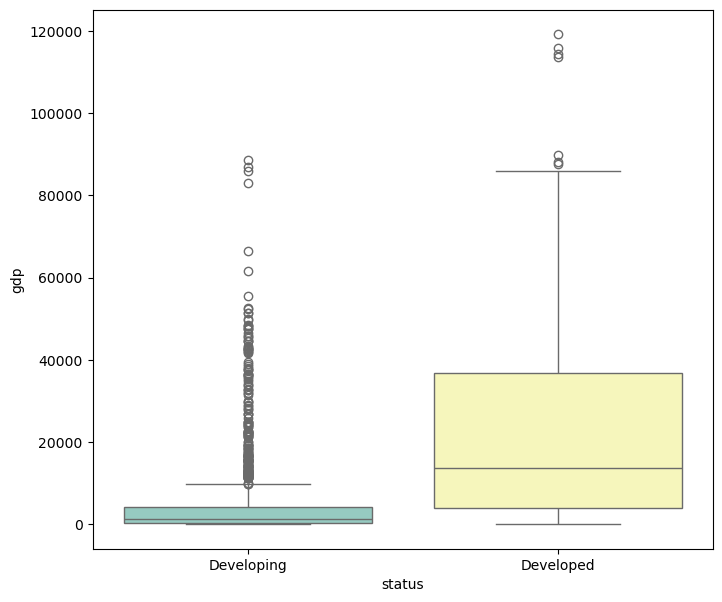

In [32]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot(x='status', y='gdp', data=data, palette='Set3')

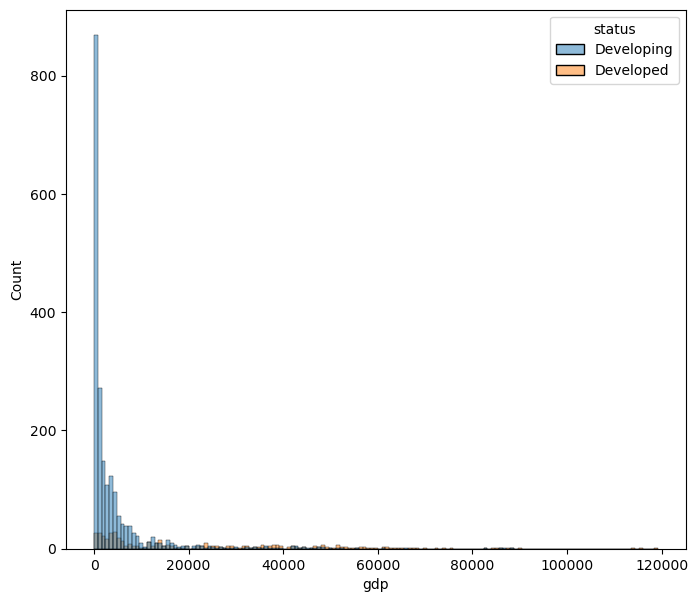

In [33]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(data, x='gdp', hue='status')

In [34]:
data.groupby(['status'])['gdp'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Developed,448.0,22053.386446,22870.827763,12.27733,3875.74091,13560.723860,36760.425993,119172.74180
Developing,2042.0,4286.556053,8772.467789,1.68135,382.74983,1246.021671,4147.739877,88564.82298


#### Boxplot for a relatively normal distribution

/var/folders/07/kjr5_wdx6tj218z3xdfcgvjw0000gn/T/ipykernel_44557/1520073819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='status', y='schooling', data=data, palette='Set3' )


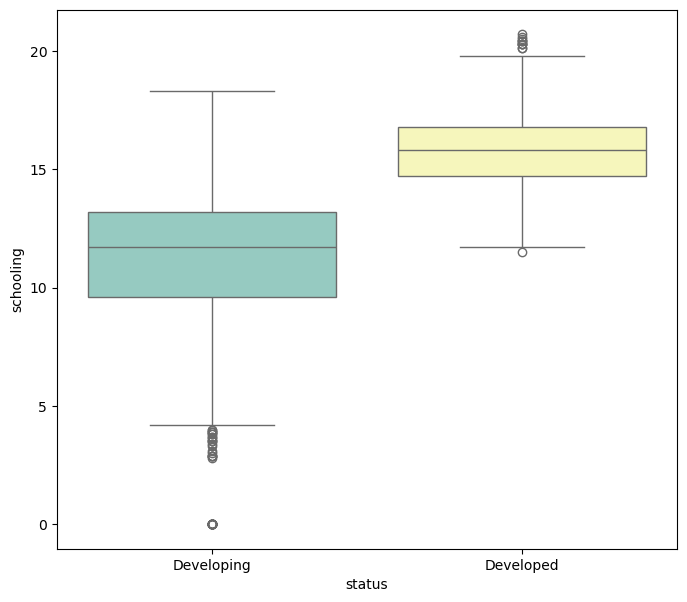

In [35]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot(x='status', y='schooling', data=data, palette='Set3' )

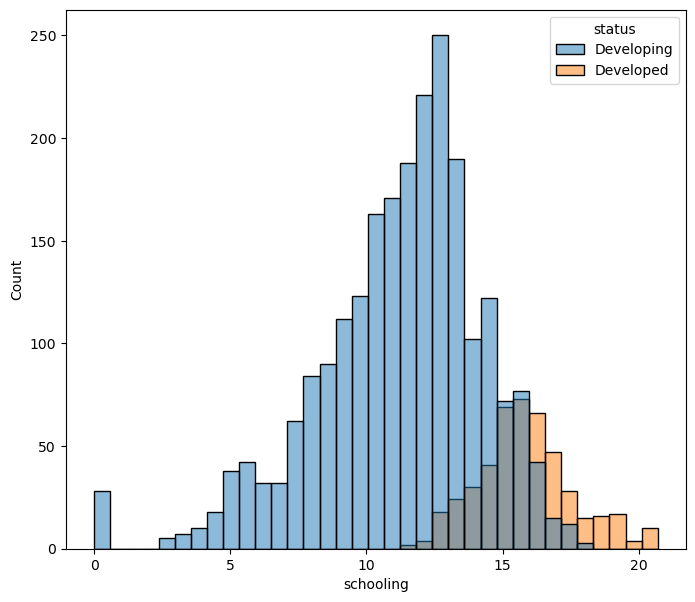

In [36]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(data, x='schooling', hue='status')

Conclusion The GDP of developing countries varies more than that of developed countries. This could accounts for the large difference in life expectancies and mortality rates.